<a href="https://colab.research.google.com/github/sabitha7674/next-word-prediction/blob/main/Copy_of_next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blue_castle.txt to blue_castle.txt


In [ ]:
file = open("blue_castle.txt", "r", encoding = "utf8" )

#store file in list
lines = []
for i in file:
     lines.append(i)

#Convert list to string
data = ""
for i in lines:
    data = '  '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]


'The Project Gutenberg eBook of The Blue Castle, by Lucy Maud Montgomery This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [ ]:
len(data)

402906

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 112, 97, 587, 4, 1, 94, 147, 58, 2383, 2384, 1818, 51, 587, 42]

In [ ]:
len(sequence_data)

72052

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8413


In [ ]:
sequences = []

for i in range (3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("The Length if sequences are:" , len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length if sequences are: 72049


array([[   1,  112,   97,  587],
       [ 112,   97,  587,    4],
       [  97,  587,    4,    1],
       [ 587,    4,    1,   94],
       [   4,    1,   94,  147],
       [   1,   94,  147,   58],
       [  94,  147,   58, 2383],
       [ 147,   58, 2383, 2384],
       [  58, 2383, 2384, 1818],
       [2383, 2384, 1818,   51]])

In [ ]:
X = []
y = []

for i in sequences:
  X.append(i[0:3])
  y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data:", X[:10])
print("Response:", y[:10])

Data: [[   1  112   97]
 [ 112   97  587]
 [  97  587    4]
 [ 587    4    1]
 [   4    1   94]
 [   1   94  147]
 [  94  147   58]
 [ 147   58 2383]
 [  58 2383 2384]
 [2383 2384 1818]]
Response: [ 587    4    1   94  147   58 2383 2384 1818   51]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation= "relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             84130     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8413)              8421413   
                                                                 
Total params: 21554543 (82.22 MB)
Trainable params: 21554543 (82.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
!pip install pydot

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

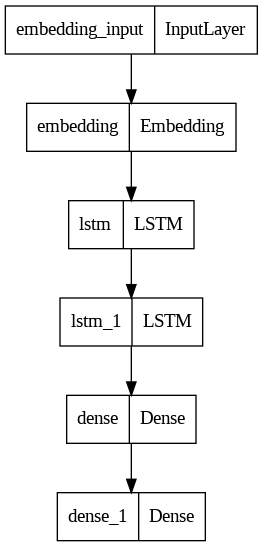

In [ ]:
plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_word.h5", monitor='loss', verbise=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
1126/1126 [==============================] - ETA: 0s - loss: 6.7523

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1126/1126 [==============================] - 983s 865ms/step - loss: 6.7523
Epoch 2/20
1126/1126 [==============================] - 935s 830ms/step - loss: 6.1849
Epoch 3/20
1126/1126 [==============================] - 930s 826ms/step - loss: 5.8068
Epoch 4/20
1126/1126 [==============================] - 926s 822ms/step - loss: 5.5235
Epoch 5/20
1126/1126 [==============================] - 941s 836ms/step - loss: 5.2838
Epoch 6/20
1126/1126 [==============================] - 922s 819ms/step - loss: 5.0560
Epoch 7/20
1126/1126 [==============================] - 951s 845ms/step - loss: 4.8272
Epoch 8/20
1126/1126 [==============================] - 910s 808ms/step - loss: 4.5893
Epoch 9/20
1126/1126 [==============================] - 928s 824ms/step - loss: 4.3399
Epoch 10/20
1126/1126 [==============================] - 943s 838ms/step - loss: 4.0869
Epoch 11/20
1126/1126 [==============================] - 917s 815ms/step - loss: 3.8341
Epoch 12/20
1126/1126 [=============================

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#Load the model and tokenizer
model = load_model('next_word.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predict_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line:")

  if text == "0":
    print("Execution completed....")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print(text)

      Predict_Next_Words(model, tokenizer, text)


    except Exception as e:
       print("Error occured: ",e)
       continue

Enter your line:The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 1s 1s/step
tm
Enter your line:The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 0s 48ms/step
tm
Enter your line:The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 0s 47ms/step
tm
Enter your line:The Project Gutenberg eBook of
['Gutenberg', 'eBook', 'of']
1/1 [==============================] - 0s 49ms/step
the
Enter your line:He was quite
['He', 'was', 'quite']
1/1 [==============================] - 0s 44ms/step
horribly
Enter your line:however, it may all come to
['all', 'come', 'to']
1/1 [==============================] - 0s 46ms/step
the
Enter your line:0
Execution completed....
